# Used Car Price Prediction (XG - Boost / Gradient Boosting / Random Forest)

## 1. Load Libraries and Import data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from jupyterthemes import jtplot

jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

In [2]:
df = pd.read_csv("cars_data.csv")

In [3]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755",3.5,6.0,225,18,24,3880,115,197


## 2.Data Manipulation

In [4]:
df = df.dropna()

df["MSRP"] = df["MSRP"].str.replace("$", "")
df["MSRP"] = df["MSRP"].str.replace(",", "")
df["MSRP"] = df["MSRP"].astype("int")

df_new = pd.get_dummies(df, columns= ['Make', 'Model', 'Type', 'Origin', 'DriveTrain'])
X = df_new.drop("MSRP", axis=1)
y = df_new["MSRP"]

X = np.array(X)
y= np.array(y)

## 3. Modelling

In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### 3.1 Random Forest Regression

Random forest is a machine learning algorithm and is used to combine the output of multiple decision trees to reach a single result. It handles both classification and regression problems.

n_estimators — the number of decision trees you will be running in the model <br>
max_features — the maximum number of features the model will consider when determining a split <br>
max_depth — this sets the maximum possible depth of each tree <br> 
randrom_state — keep everything standard

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
rf_model = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)
rf_model.fit(X_train, y_train)
R2_rf = rf_model.score(X_test, y_test)

In [8]:
from sklearn.metrics import mean_squared_error 
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf **.5

### 3.2 XG-Boost Regression

Speed and efficiency: XGBoost is highly optimized and supports parallel processing, much faster than traditional gradient boosting methods. <br>
Handling non-linear relationships: It can capture complex relationships between input features and target variables.  <br>
Feature importance: XGBoost allows for better feature selection and understanding of model behavior.  <br>

XGBoost is an extensively used framework for regression problems. Its ability to handle complex datasets, as well as its efficient gradient boosting, makes it ideal for regression models that predict continuous numerical values properly. The constant growth guarantees that XGBoost remains at the top of regression approaches, making it a vital tool for regression analysis in the field of machine learning.

In [9]:
from xgboost import XGBRegressor

In [10]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
R2_xgb = xgb_model.score(X_test, y_test)

In [11]:
from sklearn.metrics import mean_squared_error 
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb **.5

### 3.3 Gradient Boosting

In [12]:
from sklearn import ensemble

In [13]:
params = {
    "n_estimators": 300,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

BG_model = ensemble.GradientBoostingRegressor(**params)
BG_model.fit(X_train, y_train)
R2_bg = BG_model.score(X_test, y_test)

In [14]:
from sklearn.metrics import mean_squared_error 
y_pred_bg = BG_model.predict(X_test)
mse_bg = mean_squared_error(y_test, y_pred_bg)
rmse_bg = mse_bg **.5

## 4. Difference between Random Forest and XGBoost
- **Random Forest vs. XGBoost: General Comparison**
  - *Training and Dataset Handling:*
    - Random Forest is faster for training and handles larger datasets.
    - XGBoost is slower but more accurate.
    - Random Forest can handle missing values; XGBoost cannot.
  - *Nonlinear Relationships:*
    - XGBoost uses gradient boosting, handling nonlinear relationships between features.
    - Random Forest cannot handle nonlinear relationships.
  - *Ensemble Learning Methods:*
    - Both are ensemble learning methods.
    - Random Forest builds multiple independent decision trees in parallel.
    - Gradient boosting corrects errors of its predecessor in each tree.
    - Gradient boosting is a numerical optimization problem minimizing the loss function using gradient descent.

- **XGBoost Specifics:**
  - *Unbalanced Datasets:*
    - XGBoost is a good option for unbalanced datasets.
  - *Importance Assignment:*
    - XGBoost gives more importance to functional space when reducing the model cost.
    - Random Forest prefers hyperparameters for optimization.

- **Random Forest Specifics:**
  - *Tuning:*
    - Random forests are easier to tune than Boosting algorithms.

- **Overall Assessment:**
  - *XGBoost Advantages:*
    - Considered more powerful and accurate than Random Forest.
    - Utilizes decision trees as base learners with additional features like regularization and boosting.
    - Effective handling of missing values and large datasets.
    - More flexible hyperparameters for fine-tuning based on specific datasets.
 
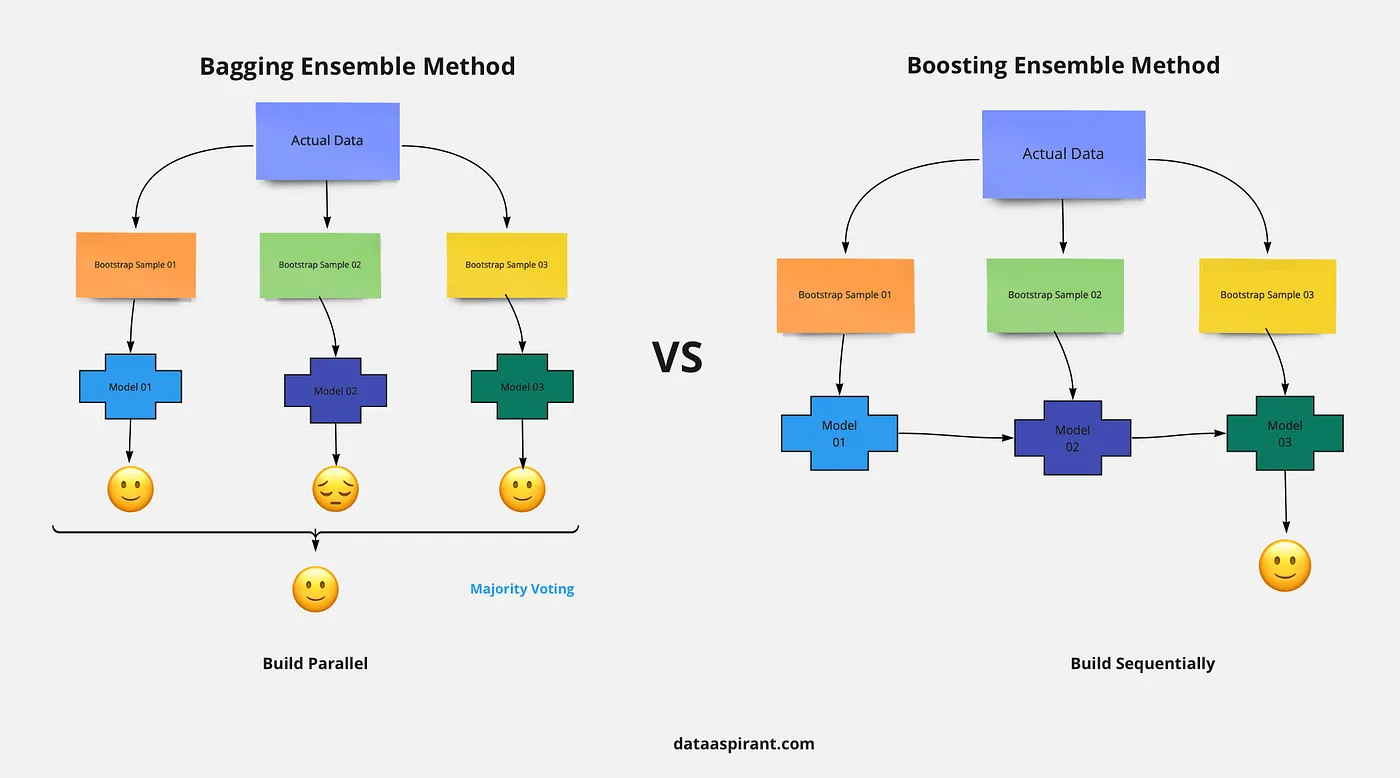

## 5. Difference between XG-Boost and Gradient Boosting
- **XGBoost vs. Gradient Boosting: A Summary**
  - *Regularization:*
    - XGBoost is a more regularized form of Gradient Boosting.
    - XGBoost employs advanced regularization (L1 & L2) for enhanced model generalization.
  - *Performance:*
    - XGBoost outperforms Gradient Boosting, delivering high performance.
    - Its training is fast and can be parallelized across clusters.
  - *Methodology:*
    - Both methods use a similar approach, building a sequence of models to minimize errors.
  - *Regularization Techniques:*
    - XGBoost includes L1 and L2 regularization to prevent overfitting.
    - Gradient Boosting lacks these regularization techniques.
  - *Speed:*
    - XGBoost is generally faster due to optimization techniques like an approximate greedy algorithm and parallel processing.
  - *Handling Missing Values:*
    - XGBoost has built-in functionality to handle missing values.
    - Gradient Boosting requires explicit imputation of missing values.
  - *Multi-Class Classification:*
    - XGBoost handles multi-class classification problems natively.
    - Gradient Boosting and AdaBoost require a One-vs-All approach for multi-class problems.

#### XG Boost:
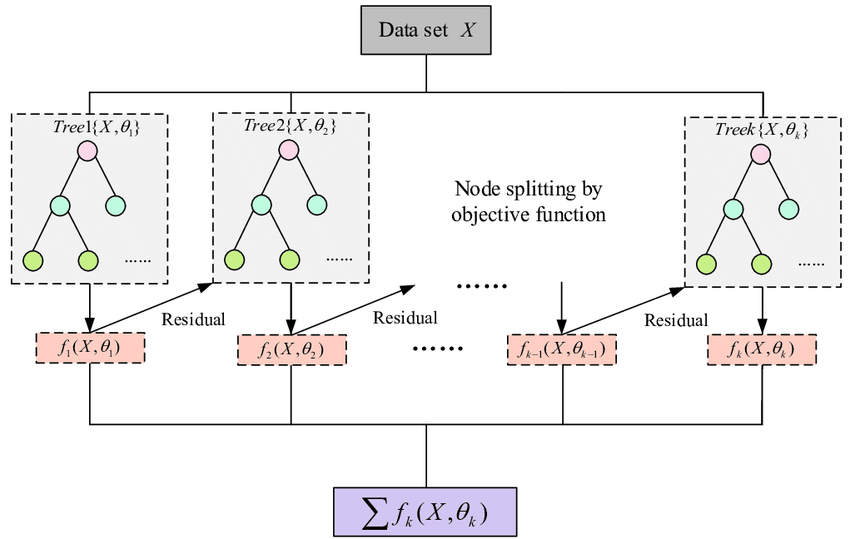

#### Gradient Boosting:
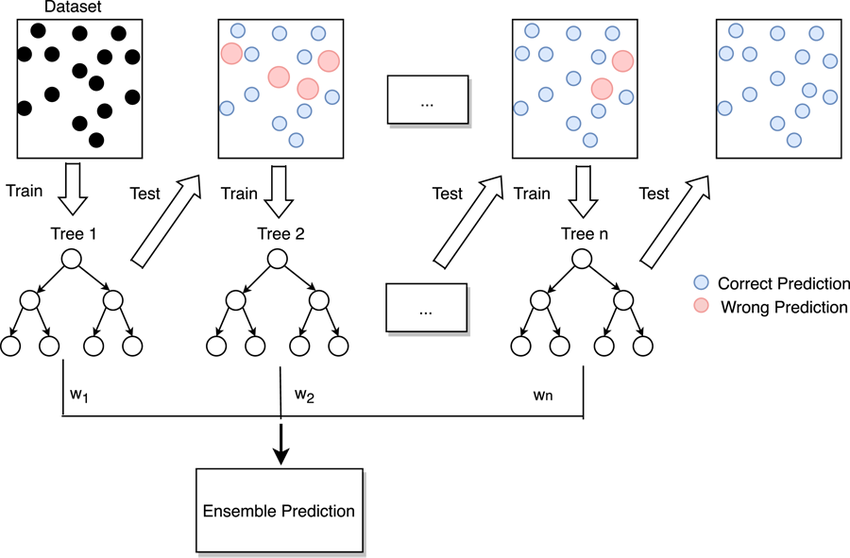

## 5. Conclusion

In [15]:
data = [['Random Forest', mse_rf, rmse_rf, R2_rf], ['XG-Boost', mse_xgb, rmse_xgb, R2_xgb], ['Gradient Boosting', mse_bg, rmse_bg, R2_bg]]
df = pd.DataFrame(data, columns=['Algorithm', 'MSE', 'RMSE','Coefficient of Determination'])
df['MSE'] = df['MSE'].astype(int)
df['RMSE'] = df['RMSE'].astype(int)
df['Coefficient of Determination'] = df['Coefficient of Determination'].astype(float)
print(df)

           Algorithm       MSE  RMSE  Coefficient of Determination
0      Random Forest  93485278  9668                      0.646491
1           XG-Boost  88840991  9425                      0.664053
2  Gradient Boosting  63675156  7979                      0.759216


### Comparison
Based on above Summary, as Boosting Gradient alorithm has highest coefficient of determination and lowest MSE and RMSE, it has the best model performance. XG boost works better than the randrom forest algorithm. Theoretically, XG-Boost should work better, it might be due small dataset and parameter used in the model.